# Paul Unger

## Research question/interests
I'm interested in researching the ratio of how many expensive games get generally positive reviews as opposed to cheaper games, as well as how much playtime a game receives, to see if the extra money is worth it

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='positive_ratings', ylabel='median_playtime'>

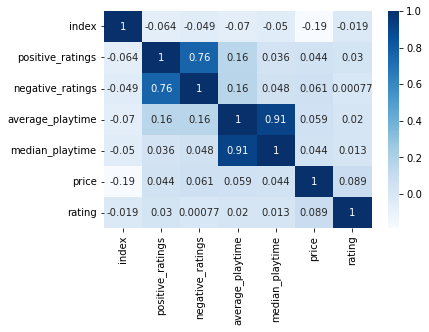

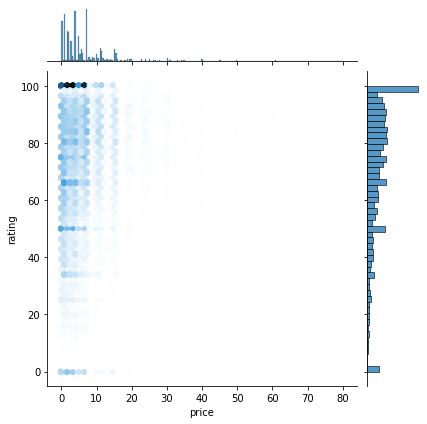

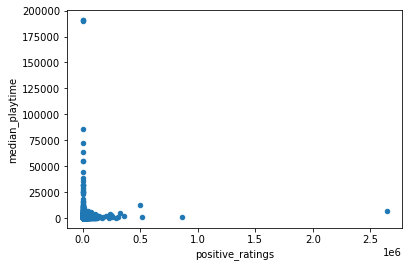

In [2]:
# Milestone 3 Task 1: EDA
df = pd.read_csv("../data/raw/steam.csv")

# drop unnecessary rows
dfc = df.drop(["appid", "release_date", "english", "developer", "publisher", "required_age", "platforms", "achievements"], axis=1)
dfc = dfc.drop(["name", "categories", "genres", "steamspy_tags", "owners"], axis=1)

# price has a ridiculous max, most likely an outlier. as most AAA games are $60-80, let's set a limit of $80 for games in this dataset
dfc = dfc[dfc["price"].between(0, 80)]

# drop rows with NaN (don't believe any such rows exist but it's a good precaution)
dfc = dfc.dropna(axis=0)
dfc = dfc.reset_index()
#dfc.to_csv("../data/processed/analysis1.csv")

# add a row with the ratio of positive ratings to total ratings
dfc["rating"] = [dfc["positive_ratings"][i] / (dfc["positive_ratings"][i] + dfc["negative_ratings"][i]) * 100 for i in range(dfc.shape[0])]

# allows us to see that there might be a correlation between playtime and ratings, as well as a slight correlation between rating and price.
sns.heatmap(dfc.corr(), annot=True, cmap="Blues")
# exploring price vs ratings, we see that most games with a high positive rating percent are within the $0-10 range
sns.jointplot(x="price", y="rating", data=dfc, kind="hex")
# here we can see that a few ten thousand reviews is enough to guarantee thousands of hours worth of playtime.
dfc.plot(kind="scatter", x="positive_ratings", y="median_playtime")

In [3]:
# Milestone 3 Task 2: Data Analysis Pipeline

# LOAD DATA
# actually load the dataset
df = pd.read_csv("../data/raw/steam.csv")

# drop rows with NaN (don't believe any such rows exist but it's a good precaution) and finally reset the index of the dataframe
dfc = df.dropna(axis=0).reset_index(drop=True)


# CLEAN DATA
# drop unnecessary columns
dfc = dfc.drop(["appid", "release_date", "english", "developer", "publisher", "required_age", "platforms", "achievements", "name", "categories", "genres", "steamspy_tags"], axis=1)

# fix 'owners' column; i'm going to average the 2 values they give as the range to get a singular value
dfc["owners"] = [int((int(i.split('-')[0]) + int(i.split('-')[1])) / 2) for i in dfc["owners"]]

# remove games with low player count (< 10,000 players) so as not to skew results with games that don't have a large enough sample size
dfc.drop(dfc[dfc.owners < 50000].index)


# PROCESS DATA
# add rows with the ratio of positive and negative ratings to total ratings
dfc["total_ratings"] = [(dfc["positive_ratings"][i] + dfc["negative_ratings"][i]) for i in range(dfc.shape[0])]
dfc["positive_percent"] = [dfc["positive_ratings"][i] / dfc["total_ratings"][i] * 100 for i in range(dfc.shape[0])]
dfc["negative_percent"] = [dfc["negative_ratings"][i] / dfc["total_ratings"][i] * 100 for i in range(dfc.shape[0])]

# price has a ridiculous max, most likely an outlier. as most AAA games are $60-80, let's set a limit of $80 for games in this dataset
dfc = dfc.drop(dfc[dfc.price > 80].index).reset_index()


# WRANGLE/EXPORT DATA
dfc.to_csv("../data/processed/analysis1.csv")

In [4]:
# Milestone 3 Task 3: Method Chaining
# in this task I realized there were some things I should add to the method chain that I didn't have in Task 1 or 2,
# so they show up in the project_functions1.py file.
import project_functions1
df = project_functions1.load_and_process("../data/raw/steam.csv")
df

,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,total_ratings,positive_percent,negative_percent
0,124534,3339,17612,317,15000000,7.19,127873,97.388815,2.611185
1,3318,633,277,62,7500000,3.99,3951,83.978740,16.021260
2,3416,398,187,34,7500000,3.99,3814,89.564761,10.435239
3,1273,267,258,184,7500000,3.99,1540,82.662338,17.337662
4,5250,288,624,415,7500000,3.99,5538,94.799567,5.200433
...,...,...,...,...,...,...,...,...,...
8407,256,141,0,0,150000,0.00,397,64.483627,35.516373
8408,52,29,0,0,35000,0.00,81,64.197531,35.802469
8409,689,78,0,0,75000,0.00,767,89.830508,10.169492
8410,74,20,0,0,35000,0.00,94,78.723404,21.276596


# Task 4: Data Analysis

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
positive_ratings,8412.0,2738.116381,1.716069e+04,0.0,86.000000,284.500000,1065.250000,8.635070e+05
negative_ratings,8412.0,539.922016,3.365440e+03,0.0,34.000000,86.000000,258.000000,1.420790e+05
average_playtime,8412.0,298.540894,9.381559e+02,0.0,0.000000,71.000000,271.000000,2.394400e+04
median_playtime,8412.0,247.406562,5.174183e+02,0.0,0.000000,70.000000,275.000000,4.993000e+03
owners,8412.0,388065.263909,2.058699e+06,35000.0,35000.000000,75000.000000,350000.000000,1.500000e+08
price,8412.0,7.074121,8.180720e+00,0.0,0.790000,4.790000,9.990000,7.899000e+01
total_ratings,8412.0,3278.038398,1.981333e+04,1.0,134.000000,391.000000,1356.000000,1.005586e+06
positive_percent,8412.0,73.086010,1.767652e+01,0.0,62.558653,76.741398,87.210476,1.000000e+02
negative_percent,8412.0,26.913990,1.767652e+01,0.0,12.789524,23.258602,37.441347,1.000000e+02


Here we can see that the bottom 25% of games still receieve a "positive" review of ~62%. However, that isn't really "positive" in the sense that the game was well received. The top 75% of games have around an 87% positive rating, so we can assume that if a game has higher than about a 85% positivity rating that it is a 'good' game.

### Price in relation to how good a game is

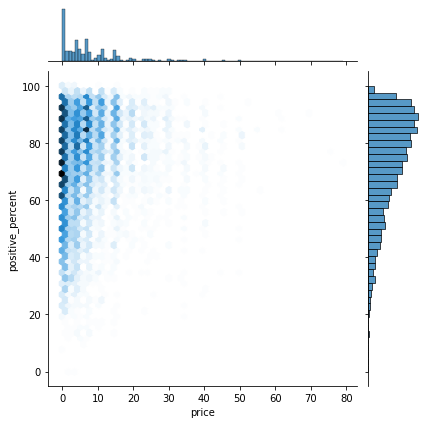

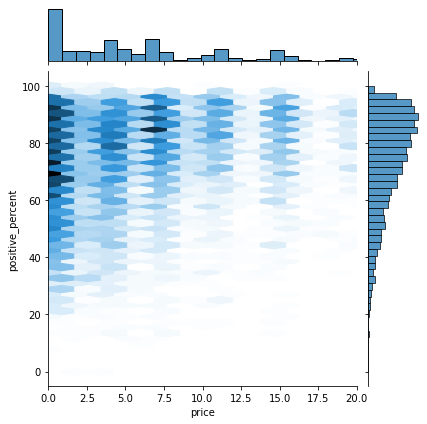

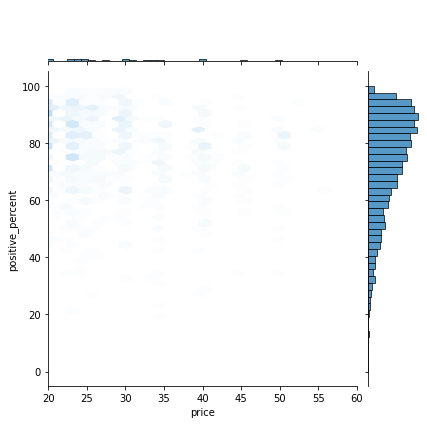

In [6]:
sns.jointplot(x="price", y="positive_percent", data=df, kind="hex")
sns.jointplot(x="price", y="positive_percent", data=df, kind="hex", xlim=(0, 20))
sns.jointplot(x="price", y="positive_percent", data=df, kind="hex", xlim=(20, 60))

With the original graph, we see that the majority of games with highest positivitiy percents and highest density are within the \\$0 - 20 range. The second graph is simply a zoomed in version of the original graph ot 0-20 so we can see the data easier. The third graph is the original graph zoomed into the 20-60 range.

Looking closer at the second graph, we see that a very large amount of games around the \\$7 mark have ~85% positivity ratings and can therefore be considered good games. We can also see that the majority of free games get ratings of around 70%; however, there is still a fair amount of games in the 85-95% range. This might be attributed to the fact that, by nature of being free, the games are more likely to have less effort put into them and thus be a less enjoyable experience. However, the substantial amount of free games with high ratings suggests that people who played these games were pleasantly surprised at how surprisingly enjoyable a game was even though they were free.

Looking at the third graph, we see a very low density of games at triple-A prices (\\$60-80) with high positivity ratings. There is a few games between the \\$20-25 range that got good ratings, but for the most part, other games hover at or below 80%. We can probably attribute this to the fact that when purchasing something more expensive, expectations are higher and thus disappointment is more likely. Maybe not to the point of hating the game, but an average of ~80% ratings makes sense in this case.

### Price in relation to playtime

<AxesSubplot:xlabel='price', ylabel='median_playtime'>

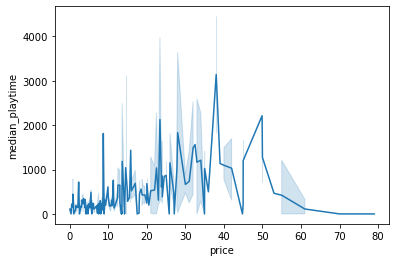

In [7]:
sns.lineplot(x="price", y="median_playtime", data=df)

(0.0, 40.0)

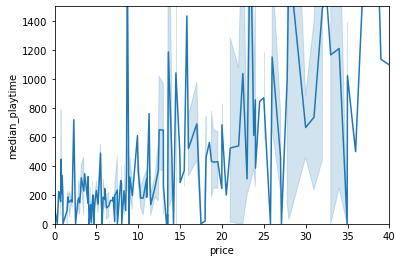

In [8]:
ax = sns.lineplot(x="price", y="median_playtime", data=df)
ax.set_ylim(0, 1500)
ax.set_xlim(0, 40)

(50.0, 80.0)

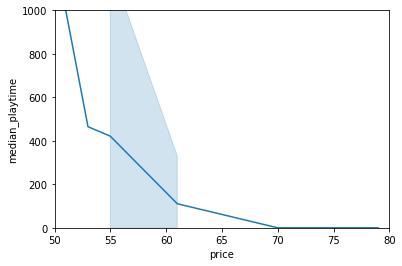

In [9]:
ax = sns.lineplot(x="price", y="median_playtime", data=df)
ax.set_ylim(0, 1000)
ax.set_xlim(50, 80)

In the first graph, we see that the amount of time spent on a game generally goes up as the price of the game rises, up to about \\$50. There are some dips at around the \\$25, \\$35, and \\$45 mark, but for the most part the general trend is upwards. However, immediately after the \\$50 mark, the amount of playtime decreases drastically up to the \\$80 mark. This is leading me to believe that at the time when the dataset was compiled, the industry standard for triple-A games was \\$60 as it has only been in the last year (or less) that the standard has increased to \\$80.

Looking at the second graph (a zoomed in version of the first one) we can see that in the \\$0-10 range, the average playtime is somewhere around 180-200 hours; however, there is a jump to about 300 hours of playtime at the \\$3 mark. After that, playtimes get more erratic but the general trend is upward, from about 400 hours at \\$10-12 to about 750-800 hours at \\$25. The data gets even more erratic as we continue going up the price range until we hit 50, when playtimes drop drastically. Given that the typical triple-A game is \\$60, we can see from the third graph that the playtime for those games are around 200 hours, 200 less than games at the \\$55 mark and several thousand less than games priced at \\$50.

### Conclusion

What, then, can we conclude? It appears that although cheaper games may have less playtime than the majority of expensive games, they have a much more positive reception among the gaming community. Comparing games in the \\$0-10 range to \\$60 triple-A titles, we see that the cheaper games have similar playtime to the triple-A games. However, the cheaper games are generally rated much higher. Perhaps cheaper games are in general a more tightly designed, well put together, enjoyable experience than triple-A titles. However, the similar playtimes in conjunction with triple-A game's trend of more negative reception, we can make the assumption that after spending a large chunk of money on a game, players are determined to get their money's worth out of it - and thus play a similar amount of the game as compared to cheaper games.

What can we say about the higher average playtimes of games in the \\$20-50 price range as compared to those in the \\$0-10 range? It's hard to say given the erraticness of the data, but perhaps these games simply have more to offer in the way of content; however, the content is simply not as enjoyable as that of cheaper games (which would explain the generally lower positive ratings). Perhaps there is no generality in games of this price range, and large differences in quality in this price range is simply a fact.

After doing this research, and taking the data into account, my personal opinion is that cheaper games are an all-around better way to spend your money. This is because you will allegedly enjoy the experience more, and be able to play more different games due to them being cheaper but having a similar playtime to \\$60 triple-A titles.